In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
sys.path.append('../fashnMnist/')
from fashnMnist.FashnMnist import FashnMnist
from fashnMnist.Preprocessor import Preprocessor

In [2]:
np.random.seed(42)

#Load Mnist fafashion dataset using keras

In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


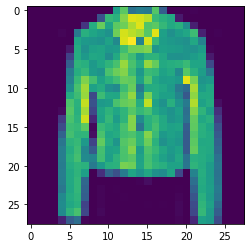

In [4]:

classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure()
plt.imshow(x_test[10])


#Data preprocessing
-verify dataset 
-perform one hot encoding

In [5]:

from sklearn.model_selection import train_test_split    
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
preprocess=Preprocessor(normalization=True)
x_trainNorm, y_trainNorm, x_testNorm, y_testNorm=preprocess.Process_Fashon_mnistDataSet(x_train, y_train, x_test, y_test)




Class Definition:
-----------------------


<b>FashnMnist</b>(<br>
    x={Features normalized using class Preprocessor}<br>
    ,<b>y=</b>[Training Labels.Data should be one hot encoded]<br>
    ,<b>lr=</b>[Learning rate ,DataType:{Float}, default:.1]<br>
    ,<b>epochs =</b>[Number of epochs]<br>
    ,<b>batch=</b>[size of batches under one epoch]       
    ,<b>layer1_size=</b>[Total hidden Nurons should present in first hidden layes , DataType{Int}]<br>
    ,<b>layer2_size=</b>[Total hidden Nurons should present in second hidden layes , DataType{Int}]<br>
    ,<b>layer3_size=</b>[Total hidden Nurons should present in Third hidden layes , DataType{Int}]<br>
    ,<b>layer4_size=</b>[Total hidden Nurons should present in fourth hidden layes , DataType{Int}]<br>
    ,<b>layer5_size=</b>[Total hidden Nurons should present in fifth hidden layes , DataType{Int}]<br>
    ,<b>optimizer=</b><b>['rms','adam','nadam','sgd','mgd','nag' ,default:'mgd']</b><br>
    ,<b>initializer=</b><b>['he','xavier','random',default: 'he']</b><br>
    ,<b>activation=</b><b>['tanh','sigmoid','relu' default:'tanh']</b><br>
    ,<b>weight_decay=</b>[weight decay for L2 regularization ,DataType:Float,default=0]<br>
    <b>dropout_rate=</b>[DataType:Float,default=0]<br>   
Methods:<br>
    <b>train()</b>: Train the model<br>
    <b>GetRunResult(x,y)</b>:<br>
        <b>-Inputs</b><br>
            -x: Normalized features<br>
            -y: labels one hot encoded<br>
        <br>
        <b>-Returns</b><br>
            -predicted data<br>
            -accurecy<br>
            -loss<br>
            <br>
Example 
-------------------------------
model=<b>FashnMnist(</b><br>x=x_trainNorm,y=y_trainNorm,
lr=.001,epochs=10,batch=32,<br>
layer1_size=128,layer2_size=64,optimizer="nadam",<br>
initializer="he",activation="relu",dropout_rate=.1<br>)
                   
model.<b>train() </b>  <br>
pred,accTrain,lossTrain = model.<b>GetRunResult(x_trainNorm,y_trainNorm)</b><br>

NAdam 
-----

In [6]:
model=FashnMnist(x=x_trainNorm,y=y_trainNorm,  lr=.001,  epochs =10, batch=16 ,               
                   layer1_size=128,\
                   layer2_size=64,\
                   optimizer="nadam",\
                   initializer="he",\
                   activation="relu",
                   weight_decay=1.5
                   
                   )
model.train()
_,accTrain,lossTrain = model.GetRunResult(x_trainNorm,y_trainNorm)
_,accTest,lossTest =model.GetRunResult(x_testNorm,y_testNorm)    
print(accTrain)
print(accTest)

Starting NAdam
.....................................


KeyboardInterrupt: 

Adam 
-------------------

In [20]:
modeladam=FashnMnist(x=x_trainNorm,y=y_trainNorm,  lr=.001,  epochs =1, batch=16 ,               
                   layer1_size=128,\
                   layer2_size=64,\
                   optimizer="adam",\
                   initializer="he",\
                   activation="relu"\
                   )
modeladam.train()
_,accTrain,lossTrain = modeladam.GetRunResult(x_trainNorm,y_trainNorm)
_,accTest,lossTest =modeladam.GetRunResult(x_testNorm,y_testNorm)    
print(accTrain)
print(accTest)

Starting Adam
.....................................
 steps=1/1 , Accuraacy =88.14 ,Loss=0.32775 
Completed
.....................................
88.14
86.02


RMSProp 
-------------------

In [8]:
modeladam=FashnMnist(x=x_trainNorm,y=y_trainNorm,  lr=.003,  epochs =5, batch=100 ,               
                   layer1_size=32,\
                   #layer2_size=64,\
                   optimizer="rms",\
                   initializer="he",\
                   activation="tanh",\
                   weight_decay=.5,\
                   lossfunction="cross"\
                   )
modeladam.train()
_,accTrain,lossTrain = modeladam.GetRunResult(x_trainNorm,y_trainNorm)
_,accTest,lossTest =modeladam.GetRunResult(x_testNorm,y_testNorm)    
print(accTrain)
print(accTest)

Starting RMSProp
.....................................
 steps=5/5 , Accuraacy =83.5 ,Loss=0.47047  
Completed
.....................................
83.505
82.08


MGD
-----

In [10]:
modeladam=FashnMnist(x=x_trainNorm,y=y_trainNorm,  lr=.1,  epochs =10, batch=100 ,               
                   layer1_size=256,\
                   layer2_size=128,\
                   optimizer="mgd",\
                   initializer="he",\
                   activation="tanh",\
                   weight_decay=.5,\
                   dropout_rate=.1
                   )
modeladam.train()
_,accTrain,lossTrain = modeladam.GetRunResult(x_trainNorm,y_trainNorm)
_,accTest,lossTest =modeladam.GetRunResult(x_testNorm,y_testNorm)    
print(accTrain)
print(accTest)

Starting Momentum Gradient Descent
.....................................
 steps=10/10 , Accuraacy =86.59 ,Loss=0.36855 
Completed
.....................................
86.58500000000001
84.44


NAG 
-------------------

In [11]:
modeladam=FashnMnist(x=x_trainNorm,y=y_trainNorm,  lr=.5,  epochs =10, batch=100 ,               
                   layer1_size=64,\
                   layer2_size=32,\
                   optimizer="nag",\
                   initializer="he",\
                   activation="tanh"\
                  
                   )
modeladam.train()
_,accTrain,lossTrain = modeladam.GetRunResult(x_trainNorm,y_trainNorm)
_,accTest,lossTest =modeladam.GetRunResult(x_testNorm,y_testNorm)    
print(accTrain)
print(accTest)

Starting NAG
.....................................
 steps=10/10 , Accuraacy =83.14 ,Loss=0.50258 
Completed
.....................................
83.13833333333334
82.03


SGD 
-------------------

In [15]:
modeladam=FashnMnist(x=x_trainNorm,y=y_trainNorm,  lr=.1,  epochs =10,\           
                   layer1_size=32,\
                   layer2_size=64,\
                   optimizer="sgd",\
                   initializer="he",\
                   activation="tanh",
                   )
modeladam.train()
_,accTrain,lossTrain = modeladam.GetRunResult(x_trainNorm,y_trainNorm)
_,accTest,lossTest =modeladam.GetRunResult(x_testNorm,y_testNorm)    
print(accTrain)
print(accTest)

.....................................
Starting Gradient Descent..
.....................................
 steps=10/10 , Accuraacy =70.55 ,Loss=0.97409 
Completed
.....................................
70.55
70.19999999999999
